In [1]:
#Task list

# search path for the module : 
# manually add module path in the code
# tensorflow initializer

In [2]:
!pip show tensorflow

Name: tensorflow
Version: 2.10.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/conda/miniconda3/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: elephas


In [3]:
import sys
import pprint

pprint.pprint(sys.path)


['/',
 '/opt/conda/miniconda3/lib/python310.zip',
 '/opt/conda/miniconda3/lib/python3.10',
 '/opt/conda/miniconda3/lib/python3.10/lib-dynload',
 '',
 '/opt/conda/miniconda3/lib/python3.10/site-packages',
 '/usr/lib/spark/python',
 '/opt/dataproc/jupyter/jupyter-extensions-2cb9d24fe01cd329a8c4352a07b0eb8f9771fb07/jupyter-gcs-contents-manager',
 '/opt/conda/miniconda3/lib/python3.10/site-packages/IPython/extensions',
 '/root/.ipython']


In [4]:
import sys
import pprint

#pprint.pprint(sys.path)

with open("/home/jurdana_masuma/test.txt", "w") as log_file:
    pprint.pprint(sys.path, log_file)

#f = open("demo.txt", "a")
#f.write("blah blah\n")
#f.close()

#open and read the file after the appending:
f = open("/home/jurdana_masuma/test.txt", "r")
print(f.read())

['/',
 '/opt/conda/miniconda3/lib/python310.zip',
 '/opt/conda/miniconda3/lib/python3.10',
 '/opt/conda/miniconda3/lib/python3.10/lib-dynload',
 '',
 '/opt/conda/miniconda3/lib/python3.10/site-packages',
 '/usr/lib/spark/python',
 '/opt/dataproc/jupyter/jupyter-extensions-2cb9d24fe01cd329a8c4352a07b0eb8f9771fb07/jupyter-gcs-contents-manager',
 '/opt/conda/miniconda3/lib/python3.10/site-packages/IPython/extensions',
 '/root/.ipython']



In [5]:
# some_file.py
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '/home/jurdana_masuma/.local/lib/python3.10/site-packages')

import tensorflow as tf

2023-09-20 21:44:18.796862: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-20 21:44:18.943100: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-20 21:44:18.949230: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-20 21:44:18.949249: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [6]:
'''
On worker nnodes
['',
 '/opt/conda/default/lib/python310.zip',
 '/opt/conda/default/lib/python3.10',
 '/opt/conda/default/lib/python3.10/lib-dynload',
 ***'/home/jurdana_masuma/.local/lib/python3.10/site-packages',
 '/opt/conda/default/lib/python3.10/site-packages',
 '/usr/lib/spark/python']

on Master node
['',
 '/opt/conda/default/lib/python310.zip',
 '/opt/conda/default/lib/python3.10',
 '/opt/conda/default/lib/python3.10/lib-dynload',
 '/opt/conda/default/lib/python3.10/site-packages',
 '/usr/lib/spark/python',
 '/opt/dataproc/jupyter/jupyter-extensions-2cb9d24fe01cd329a8c4352a07b0eb8f9771fb07/jupyter-gcs-contents-manager']
 
'''

"\nOn worker nnodes\n['',\n '/opt/conda/default/lib/python310.zip',\n '/opt/conda/default/lib/python3.10',\n '/opt/conda/default/lib/python3.10/lib-dynload',\n ***'/home/jurdana_masuma/.local/lib/python3.10/site-packages',\n '/opt/conda/default/lib/python3.10/site-packages',\n '/usr/lib/spark/python']\n\non Master node\n['',\n '/opt/conda/default/lib/python310.zip',\n '/opt/conda/default/lib/python3.10',\n '/opt/conda/default/lib/python3.10/lib-dynload',\n '/opt/conda/default/lib/python3.10/site-packages',\n '/usr/lib/spark/python',\n '/opt/dataproc/jupyter/jupyter-extensions-2cb9d24fe01cd329a8c4352a07b0eb8f9771fb07/jupyter-gcs-contents-manager']\n \n"

In [7]:
#!pip install pip install --upgrade pip
#!pip install tensorflow
#import tensorflow as tf

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda

from multiprocessing.pool import ThreadPool

In [8]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql.functions import col, pandas_udf, PandasUDFType
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType, ArrayType, BinaryType

from pyspark.sql.functions import udf
import subprocess

import pickle

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
from matplotlib.colors import hsv_to_rgb
#from keras.utils import normalize
import glob

import time
from sklearn.preprocessing import LabelEncoder

#other file code
import shutil
from PIL import Image
import uuid
from tensorflow.keras.applications.resnet50 import ResNet50

In [9]:
################################################################
def multi_unet_model(n_classes=3, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=1):
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = inputs
    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
    
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    p5 = MaxPooling2D(pool_size=(2, 2))(c5)
     
    c6 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p5)
    c6 = Dropout(0.3)(c6)
    c6 = Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
    
    #Expansive path
    u7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c5])
    c7 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
    
    u8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c4])
    c8 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c3])
    c9 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    u10 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c9)
    u10 = concatenate([u10, c2])
    c10 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u10)
    c10 = Dropout(0.1)(c10)
    c10 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c10)
     
    u11 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c10)
    u11 = concatenate([u11, c1], axis=3)
    c11 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u11)
    c11 = Dropout(0.1)(c11)
    c11 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c11)
     
    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c11)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    
    return model

IMG_HEIGHT = 256 #X_train.shape[1]
IMG_WIDTH  = 256 #X_train.shape[2]
IMG_CHANNELS = 1 #X_train.shape[3]
n_classes = 3

def get_model():
    return multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

def only_shadow_cloud_removal(ori):

    ### seperate open water
    lower_water = (0, 0, 0)
    upper_water = (185, 255, 30)
    hsv_img = cv2.cvtColor(ori, cv2.COLOR_RGB2HSV)
    mask_water = (cv2.inRange(hsv_img, lower_water, upper_water))

    # duplicate the image
    without_water_img = ori.copy()
    without_water_img[mask_water == 255] = [255, 255, 255]
    #plot_image(ori, water_img)

    #img = cv2.imread('s2_vis_2.png',cv2.IMREAD_GRAYSCALE)
    img = cv2.cvtColor(without_water_img, cv2.COLOR_RGB2GRAY)

    dilated_img = cv2.dilate(img, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 155)
    diff_img = 255 - cv2.absdiff(img, bg_img)

    ret2, outs2 = cv2.threshold(src = diff_img, thresh = 0, maxval = 255, type = cv2.THRESH_OTSU+cv2.THRESH_BINARY)
    diff_img2 = cv2.bitwise_and(diff_img, outs2)

    norm_img = cv2.normalize(diff_img2, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    _, thr_img = cv2.threshold(norm_img, 235, 0, cv2.THRESH_TRUNC)
    thr_img = cv2.normalize(thr_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

    ### seperate thin and old ice
    old_thin_ice = cv2.cvtColor(thr_img,cv2.COLOR_GRAY2RGB)
    hsv_img = cv2.cvtColor(old_thin_ice, cv2.COLOR_RGB2HSV)

    lower_tice = (0, 0, 0)
    upper_tice = (185, 255, 204)
    mask_tice = cv2.inRange(hsv_img, lower_tice, upper_tice)

    lower_ice = (0, 0, 205)
    upper_ice = (185, 255, 255)
    mask_ice = cv2.inRange(hsv_img, lower_ice, upper_ice)
    mask_ice = cv2.bitwise_xor(mask_water, mask_ice)
    #plot_image3(mask_water, mask_tice, mask_ice)

    # duplicate the image
    shadow_free = old_thin_ice.copy()
    #color each masked portion
    shadow_free[mask_ice == 255] = [255, 255, 255]
    shadow_free[mask_tice == 255] = [155, 155, 155]
    shadow_free[mask_water == 255] = [0, 0, 0]
    shadow_free = cv2.cvtColor(shadow_free, cv2.COLOR_BGR2RGB)
    #seg_img = color_segmentation(ori)
    #seg_res = color_segmentation(shadow_free)
    
    return shadow_free


def u_net_auto_inferencing(img, mask):
    
    img = only_shadow_cloud_removal(img)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

    labelencoder = LabelEncoder()
    n, h, w = mask.shape
    mask_reshaped = mask.reshape(-1,1)
    mask_reshaped_encoded = labelencoder.fit_transform(mask_reshaped)
    mask_encoded_original_shape = mask_reshaped_encoded.reshape(n, h, w)

    test_img_norm=img[:,:,0][:,:,None]
    test_img_input=np.expand_dims(test_img_norm, 0)
    prediction = (model.predict(test_img_input, verbose=0))
    predicted_img=np.argmax(prediction, axis=3)[0,:,:]
    return predicted_img
    
def cloud_removal(img_data):
    img = np.asarray(bytearray(img_data), dtype="uint8").reshape(256, 256, 3)
    img = only_shadow_cloud_removal(img)
    return img



In [10]:
'''
model = get_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.load_weights('/home/jurdana_masuma/autolabel_model.hdf5')

print("model loading done")

import pickle
pickle.dump(model, open('/home/jurdana_masuma/unet_model.pkl', 'wb'))
pickled_model = pickle.load(open('/home/jurdana_masuma/unet_model.pkl', 'rb'))
#pickled_model.predict(X_test)

#pickle_out = open("/home/jurdana_masuma/autolabel_model.pkl", "wb")
#pickle.dump(model, pickle_out)
#pickle_out.close()
'''

'\nmodel = get_model()\nmodel.compile(optimizer=\'adam\', loss=\'categorical_crossentropy\', metrics=[\'accuracy\'])\nmodel.load_weights(\'/home/jurdana_masuma/autolabel_model.hdf5\')\n\nprint("model loading done")\n\nimport pickle\npickle.dump(model, open(\'/home/jurdana_masuma/unet_model.pkl\', \'wb\'))\npickled_model = pickle.load(open(\'/home/jurdana_masuma/unet_model.pkl\', \'rb\'))\n#pickled_model.predict(X_test)\n\n#pickle_out = open("/home/jurdana_masuma/autolabel_model.pkl", "wb")\n#pickle.dump(model, pickle_out)\n#pickle_out.close()\n'

# === Spark Master node start ===

## UDF testing Master

In [5]:
model = get_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.load_weights("/home/jurdana_masuma/autolabel_model.hdf5")

def u_net_auto_inferencing_model_master(img_data):
    img = np.asarray(bytearray(img_data), dtype="uint8").reshape(256, 256, 3)
    img = only_shadow_cloud_removal(img)
    
    #section start
    test_img_norm=img[:,:,0][:,:,None]
    test_img_input=np.expand_dims(test_img_norm, 0)
    prediction = (model.predict(test_img_input, verbose=0))
    predicted_img=np.argmax(prediction, axis=3)[0,:,:]
    return predicted_img
    #section end

2023-09-12 17:53:07.542796: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-09-12 17:53:07.542832: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-09-12 17:53:07.542860: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cluster-70ea-m): /proc/driver/nvidia/version does not exist
2023-09-12 17:53:07.543194: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## SparkSession Master Local

In [6]:
spark = SparkSession.builder.appName("SparkMaster_4") \
        .master("local[*]") \
        .config("spark.executor.memory", "2G") \
        .config("spark.driver.memory", "1G") \
        .config("spark.logConf", "true") \
        .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/09/12 17:53:16 INFO SparkEnv: Registering MapOutputTracker
23/09/12 17:53:16 INFO SparkEnv: Registering BlockManagerMaster
23/09/12 17:53:16 INFO SparkEnv: Registering BlockManagerMasterHeartbeat
23/09/12 17:53:16 INFO SparkEnv: Registering OutputCommitCoordinator
23/09/12 17:53:19 WARN GhfsStorageStatistics: Detected potential high latency for operation op_get_file_status. latencyMs=320; previousMaxLatencyMs=0; operationCount=1; context=gs://dataproc-temp-us-central1-79951293455-locxv73f/5b7e5890-708c-4cb1-b89a-1330b3095ec1/spark-job-history
23/09/12 17:53:19 WARN GhfsStorageStatistics: Detected potential high latency for operation op_mkdirs. latencyMs=178; previousMaxLatencyMs=0; operationCount=1; context=gs://dataproc-temp-us-central1-79951293455-locxv73f/5b7e5890-708c-4cb1-b89a-1330b3095ec1/spark-job-history


In [7]:
#spark.sparkContext.getConf().getAll()

## Spark Execution

23/09/12 17:53:22 WARN GhfsStorageStatistics: Detected potential high latency for operation op_glob_status. latencyMs=264; previousMaxLatencyMs=0; operationCount=1; context=path=gs://s2_seg/test_images/*.png; pattern=com.google.cloud.hadoop.fs.gcs.GoogleHadoopFileSystemBase$$Lambda$820/0x000000010071c840@27add087


INFO:tensorflow:Assets written to: ram://3205ae95-01a6-4c7e-8f20-da8df90625ec/assets


INFO:tensorflow:Assets written to: ram://3205ae95-01a6-4c7e-8f20-da8df90625ec/assets
23/09/12 17:53:40 WARN GhfsStorageStatistics: Detected potential high latency for operation op_open. latencyMs=121; previousMaxLatencyMs=0; operationCount=2; context=gs://s2_seg/test_images/s2_vis_00_0768_1792.png
23/09/12 17:53:40 WARN GhfsStorageStatistics: Detected potential high latency for operation op_open. latencyMs=123; previousMaxLatencyMs=121; operationCount=2; context=gs://s2_seg/test_images/s2_vis_00_1024_1024.png
2023-09-12 17:53:42.498971: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-12 17:53:42.595675: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with o

128


INFO:tensorflow:Assets written to: ram://79db0174-6de2-438a-a4f4-af5b2ef312e2/assets


INFO:tensorflow:Assets written to: ram://79db0174-6de2-438a-a4f4-af5b2ef312e2/assets


Data Partitions 4
Spark Data Load time is  10.31247615814209
Spark model map time  0.8757998943328857
Spark model map-reduce time  50.05439782142639
Total time  11.188276052474976
root
 |-- image: struct (nullable = true)
 |    |-- origin: string (nullable = true)
 |    |-- height: integer (nullable = true)
 |    |-- width: integer (nullable = true)
 |    |-- nChannels: integer (nullable = true)
 |    |-- mode: integer (nullable = true)
 |    |-- data: binary (nullable = true)



23/09/12 17:54:31 WARN GhfsStorageStatistics: Detected potential high latency for operation op_rename. latencyMs=219; previousMaxLatencyMs=0; operationCount=1; context=rename(gs://dataproc-temp-us-central1-79951293455-locxv73f/5b7e5890-708c-4cb1-b89a-1330b3095ec1/spark-job-history/local-1694541196829.inprogress -> gs://dataproc-temp-us-central1-79951293455-locxv73f/5b7e5890-708c-4cb1-b89a-1330b3095ec1/spark-job-history/local-1694541196829)


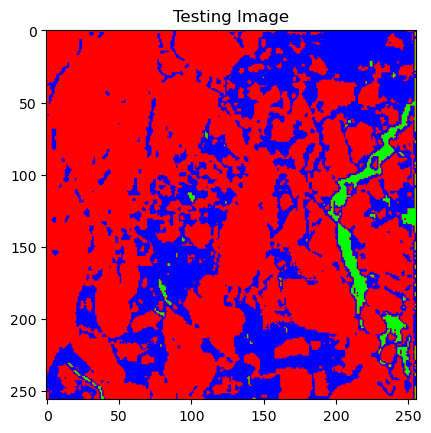

In [8]:
#spark = SparkSession.builder.appName("SparkUnetInferencing").master("local[4]").config("spark.executor.memory", "4G").config("spark.driver.memory", "2G").getOrCreate()
#spark = SparkSession.builder.appName("SparkUnetInferencing2").config("spark.executor.instances", "2").config("spark.executor.cores", "2").config("spark.executor.memory", "4G").config("spark.driver.memory", "2G").config("spark.logConf", "true").getOrCreate()
#.config("spark.executor.resource.gpu.amount", "1") \
#.config("spark.rapids.sql.enabled", "true") \

spark_begin = time.time()
#"gs://s2seg/train_images/*.png" "gs://s2seg/test_images/*.png"
images_dir = "gs://s2_seg/test_images/*.png"
image_df = spark.read.format("image").load(images_dir)#.filter("image.nChannels > 2 AND image.height < 1000")
#image_df = image_df.orderBy(['image.origin'], ascending = [True])
#image_df.select("image.origin", "image.height", "image.width", "image.mode", "image.nChannels").show(5, truncate=False)

model_begin = time.time()

#image_rdd = image_df.rdd.map(lambda x: cloud_removal(x.image.data))#.collect()
image_rdd = image_df.rdd.map(lambda x: u_net_auto_inferencing_model_master(x.image.data))
#image_rdd = image_df.rdd.map(lambda x: u_net_auto_inferencing_model(x.image.data))
#image_rdd = image_df.rdd.map(lambda x: u_net_predict(x.image.data))
end = time.time()

print(image_rdd.count())
end2 = time.time()

image = np.asarray(image_rdd.take(1)[0])#.reshape(256, 256, 3)
#print(image.shape)
plt.figure()
plt.title('Testing Image')
plt.imshow(image, cmap="brg")

print("Data Partitions", image_df.rdd.getNumPartitions())
print("Spark Data Load time is ", model_begin-spark_begin)
print("Spark model map time ", end-model_begin)
print("Spark model map-reduce time ", end2-model_begin)
print("Total time ", end-spark_begin)

image_df.printSchema()
spark.stop()

# === Spark Master node end ===

In [9]:
spark.stop()

# === Spark Worker Node check Start ===

In [10]:
#CPU benchmark, for a sample code, 
#try chameleon later
#sc.getConf().get("spark.executor.instances")
#!pip install findspark

In [11]:
import findspark
findspark.init()

In [12]:
#spark.stop()

In [13]:
spark = SparkSession.builder.appName("TestModelSparkCheck_32_image") \
        .config("spark.executor.instances", "3") \
        .config("spark.executor.cores", "2") \
        .config("spark.executor.memory", "4G") \
        .config("spark.driver.memory", "4G") \
        .config("spark.logConf", "true") \
        .config("spark.dynamicAllocation.enabled","false") \
        .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/09/20 21:44:44 INFO SparkEnv: Registering MapOutputTracker
23/09/20 21:44:44 INFO SparkEnv: Registering BlockManagerMaster
23/09/20 21:44:44 INFO SparkEnv: Registering BlockManagerMasterHeartbeat
23/09/20 21:44:44 INFO SparkEnv: Registering OutputCommitCoordinator
23/09/20 21:44:51 WARN GhfsStorageStatistics: Detected potential high latency for operation op_get_file_status. latencyMs=310; previousMaxLatencyMs=0; operationCount=1; context=gs://dataproc-temp-us-central1-79951293455-locxv73f/5b7e5890-708c-4cb1-b89a-1330b3095ec1/spark-job-history
23/09/20 21:44:51 WARN GhfsStorageStatistics: Detected potential high latency for operation op_mkdirs. latencyMs=247; previousMaxLatencyMs=0; operationCount=1; context=gs://dataproc-temp-us-central1-79951293455-locxv73f/5b7e5890-708c-4cb1-b89a-1330b3095ec1/spark-job-history


In [15]:
sc = spark._jsc.sc() 

result1 = sc.getExecutorMemoryStatus().keys() # will print all the executors + driver available

result2 = len([executor.host() for executor in sc.statusTracker().getExecutorInfos() ]) -1

result3 = sc.getExecutorMemoryStatus().size()

print(result1, end ='\n')
print(result2)
print(result3)

Set(cluster-70ea-w-0.us-central1-f.c.feisty-outlet-393918.internal:34697, cluster-70ea-m.us-central1-f.c.feisty-outlet-393918.internal:33783, cluster-70ea-w-1.us-central1-f.c.feisty-outlet-393918.internal:34101, cluster-70ea-w-2.us-central1-f.c.feisty-outlet-393918.internal:32849)
3
4


In [16]:
sc.defaultParallelism()

6

In [11]:
sc = spark.sparkContext

In [12]:
#spark.sparkContext.getConf().getAll()

## inferencing on worker node from spark file

In [17]:
from pyspark import SparkFiles
from keras.models import load_model

spark.sparkContext.addFile("/home/jurdana_masuma/autolabel_model.hdf5")
path = SparkFiles.get("/home/jurdana_masuma/autolabel_model.hdf5")

#spark.sparkContext.addFile("/home/jurdana_masuma/unet_model.pkl")
#path2 = SparkFiles.get("/home/jurdana_masuma/unet_model.pkl")
#model = load_model(path)

model = get_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.load_weights(path)
#model.load_weights("/home/jurdana_masuma/autolabel_model.hdf5")

#import pickle
#pickle.dump(model, open('/home/jurdana_masuma/unet_model.pkl', 'wb'))
#pickled_model = pickle.load(open(path2, 'rb'))
#pickled_model.predict(X_test)


#worker node broadcast
#bc_model = sc.broadcast(pickled_model)

#bc_model_weights = sc.broadcast(pickled_model.get_weights())
#weights = rdd.context.broadcast(pickled_model.get_weights())

2023-09-20 21:45:07.291062: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-09-20 21:45:07.291107: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-09-20 21:45:07.291134: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cluster-70ea-m): /proc/driver/nvidia/version does not exist
2023-09-20 21:45:07.291541: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## UDF testing

In [20]:
def u_net_auto_inferencing_model(img_data):
    
    #!pip install pip install --upgrade pip
    #!pip install tensorflow
    
    #from pip._internal import main as pipmain
    #pipmain(['install', 'tensorflow'])
    # some_file.py
    import sys
    # caution: path[0] is reserved for script path (or '' in REPL)
    sys.path.insert(1, '/home/jurdana_masuma/.local/lib/python3.10/site-packages')

    import tensorflow as tf
    
    #run the install pip
    from keras.models import Model
    from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
    #from multiprocessing.pool import ThreadPool
    #
    ##python tf directory same as the pyspark
    ##searialization issue worker nodes
    #
    img = np.asarray(bytearray(img_data), dtype="uint8").reshape(256, 256, 3)
    img = only_shadow_cloud_removal(img)
    #
    ##section start
    test_img_norm=img[:,:,0][:,:,None]
    test_img_input=np.expand_dims(test_img_norm, 0)
    prediction = (model.predict(test_img_input, verbose=0))
    predicted_img=np.argmax(prediction, axis=3)[0,:,:]
    return predicted_img
    ##section end
    
    #return img

## Spark Execution

In [21]:
#spark = SparkSession.builder.appName("SparkUnetInferencing").master("local[4]").config("spark.executor.memory", "4G").config("spark.driver.memory", "2G").getOrCreate()
#spark = SparkSession.builder.appName("SparkUnetInferencing2").config("spark.executor.instances", "2").config("spark.executor.cores", "2").config("spark.executor.memory", "4G").config("spark.driver.memory", "2G").config("spark.logConf", "true").getOrCreate()
#.config("spark.executor.resource.gpu.amount", "1") \
#.config("spark.rapids.sql.enabled", "true") \

spark_begin = time.time()
#"gs://s2seg/train_images/*.png" "gs://s2seg/test_images/*.png"
images_dir = "gs://s2_seg/test_images/*.png"
image_df = spark.read.format("image").load(images_dir)#.filter("image.nChannels > 2 AND image.height < 1000")
#image_df = image_df.orderBy(['image.origin'], ascending = [True])
#image_df.select("image.origin", "image.height", "image.width", "image.mode", "image.nChannels").show(5, truncate=False)

model_begin = time.time()
print("starting----------------------")
#image_rdd = image_df.rdd.map(lambda x: cloud_removal(x.image.data))#.collect()
#image_rdd = image_df.rdd.map(lambda x: u_net_auto_inferencing_model_master(x.image.data))
image_rdd = image_df.rdd.map(lambda x: u_net_auto_inferencing_model(x.image.data))
#image_rdd = image_df.rdd.map(lambda x: u_net_predict(x.image.data))
end = time.time()

print(image_rdd.count())
end2 = time.time()

image = np.asarray(image_rdd.take(1)[0])#.reshape(256, 256, 3)
#print(image.shape)
plt.figure()
plt.title('Testing Image')
plt.imshow(image, cmap="brg")

print("Data Partitions", image_df.rdd.getNumPartitions())
print("Spark Data Load time is ", model_begin-spark_begin)
print("Spark model map time ", end-model_begin)
print("Spark model map-reduce time ", end2-model_begin)
print("Total time ", end-spark_begin)

image_df.printSchema()
spark.stop()

starting----------------------


INFO:tensorflow:Assets written to: ram://1fb7ce7a-b410-4e38-96aa-cb94ecab7f6c/assets


INFO:tensorflow:Assets written to: ram://1fb7ce7a-b410-4e38-96aa-cb94ecab7f6c/assets
23/09/20 21:47:22 WARN TaskSetManager: Lost task 3.0 in stage 3.0 (TID 281) (cluster-70ea-w-0.us-central1-f.c.feisty-outlet-393918.internal executor 2): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/worker.py", line 668, in main
    func, profiler, deserializer, serializer = read_command(pickleSer, infile)
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/worker.py", line 87, in read_command
    command = serializer.loads(command.value)
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 471, in loads
    return cloudpickle.loads(obj, encoding=encoding)
ModuleNotFoundError: No module named 'keras'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:559)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:765)
	

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 3.0 failed 4 times, most recent failure: Lost task 0.3 in stage 3.0 (TID 296) (cluster-70ea-w-0.us-central1-f.c.feisty-outlet-393918.internal executor 2): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/worker.py", line 668, in main
    func, profiler, deserializer, serializer = read_command(pickleSer, infile)
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/worker.py", line 87, in read_command
    command = serializer.loads(command.value)
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 471, in loads
    return cloudpickle.loads(obj, encoding=encoding)
ModuleNotFoundError: No module named 'keras'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:559)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:765)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:747)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:512)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD.$anonfun$collect$2(RDD.scala:1021)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2276)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:136)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:548)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:551)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2673)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2609)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2608)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2608)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1182)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2861)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2803)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2792)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:952)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2236)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2257)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2276)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2301)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1021)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1020)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:180)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/worker.py", line 668, in main
    func, profiler, deserializer, serializer = read_command(pickleSer, infile)
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/worker.py", line 87, in read_command
    command = serializer.loads(command.value)
  File "/usr/lib/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 471, in loads
    return cloudpickle.loads(obj, encoding=encoding)
ModuleNotFoundError: No module named 'keras'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:559)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:765)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:747)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:512)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD.$anonfun$collect$2(RDD.scala:1021)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2276)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:136)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:548)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:551)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more


23/09/20 21:47:24 WARN TaskSetManager: Lost task 5.3 in stage 3.0 (TID 300) (cluster-70ea-w-2.us-central1-f.c.feisty-outlet-393918.internal executor 1): TaskKilled (Stage cancelled)


# --- Spark Map

In [ ]:
######------> new change
sc = spark.sparkContext
def u_net_auto_inferencing_pkl(img_data):
    model_rdd_pkl = sc.binaryFiles("/home/jurdana_masuma/autolabel_model.pkl")
    model_rdd_data = model_rdd_pkl.collect()
    
    model = pickle.loads(model_rdd_data[0][1])
    broadcast_model = sc.broadcast(model)
    print(broadcast_model.value)
    #model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    #model.load_weights('/home/jurdana_masuma/autolabel_model.hdf5')
    img = np.asarray(bytearray(img_data), dtype="uint8").reshape(256, 256, 3)
    img = only_shadow_cloud_removal(img)
    test_img_norm=img[:,:,0][:,:,None]
    test_img_input=np.expand_dims(test_img_norm, 0)
    prediction = (broadcast_model.value.predict(test_img_input, verbose=0))
    predicted_img=np.argmax(prediction, axis=3)[0,:,:]
    return predicted_img

In [6]:
#spark.stop()

## --- model as spark file

In [8]:
from pyspark import SparkFiles
from keras.models import load_model

spark.sparkContext.addFile("/home/jurdana_masuma/autolabel_model.hdf5")
def fun(img_data):
    path = SparkFiles.get("/home/jurdana_masuma/autolabel_model.hdf5")
    #model = load_model(path)
    model = get_model()
    #model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.load_weights(path)
    img = np.asarray(bytearray(img_data), dtype="uint8").reshape(256, 256, 3)
    img = only_shadow_cloud_removal(img)
    test_img_norm=img[:,:,0][:,:,None]
    test_img_input=np.expand_dims(test_img_norm, 0)
    prediction = (model.predict(test_img_input, verbose=0))
    predicted_img=np.argmax(prediction, axis=3)[0,:,:]
    return predicted_img

# tds Unpickle, pkl file

In [7]:
# Create spark session
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [8]:
# Unpickle, pkl file
#model_rdd_pkl = sc.binaryFiles("home/jurdana_masuma/unet_model.pkl")
#model_rdd_data = model_rdd_pkl.collect()

from pyspark import SparkFiles
from keras.models import load_model

spark.sparkContext.addFile("/home/jurdana_masuma/unet_model.pkl")
path = SparkFiles.get("/home/jurdana_masuma/unet_model.pkl")
unet_model = pickle.load(open(path, 'rb'))

# Load and broadcast python object over spark nodes
#unet_model = pickle.loads(model_rdd_data[0][1])
broadcast_unet_model = sc.broadcast(unet_model)
print(broadcast_unet_model.value)

2023-08-16 22:09:50.847888: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-16 22:09:50.896501: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-16 22:09:50.896560: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cluster-70ea-m): /proc/driver/nvidia/version does not exist
2023-08-16 22:09:50.958188: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


INFO:tensorflow:Assets written to: ram://58013e60-0a64-4537-80a6-970d934351ac/assets


INFO:tensorflow:Assets written to: ram://58013e60-0a64-4537-80a6-970d934351ac/assets


In [25]:
#@pandas_udf(ArrayType(DecimalType()), PandasUDFType.SCALAR)
def u_net_predict(img_data):
    img = np.asarray(bytearray(img_data), dtype="uint8").reshape(256, 256, 3)
    img = only_shadow_cloud_removal(img)
    test_img_norm=img[:,:,0][:,:,None]
    test_img_input=np.expand_dims(test_img_norm, 0)
    
    prediction = broadcast_unet_model.value.predict(test_img_input, verbose=0)
    
    predicted_img=np.argmax(prediction, axis=3)[0,:,:]
    return predicted_img

In [27]:
predict_udf = udf(u_net_predict, ArrayType(IntegerType()))

# Word count

In [37]:
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

sc=spark.sparkContext

file_path = "gs://s2seg/romeojuliet.txt"
data = sc.textFile(file_path)
data = data.flatMap(lambda satir: satir.split(" "))
data = data.filter(lambda x:x!='')
data.take(5)
counts = data.map(lambda word: (word, 1)) \
             .reduceByKey(lambda x, y: x + y)
counts.collect()
spark.stop()

# Spark Pipeline

In [11]:
from pyspark.ml import PipelineModel
from pyspark.sql import SparkSession
from pyspark import SparkFiles

In [12]:
spark = SparkSession.builder \
    .appName("Pretrained Model Inference") \
    .getOrCreate()


In [7]:
#model_url = "https://storage.googleapis.com/s2seg/autolabel_model.hdf5"
#spark.sparkContext.addFile(model_url)

model_path = "home/jurdana_masuma/autolabel_model.hdf5" #gs://s2seg/autolabel_model.hdf5
model_pipelined = PipelineModel.load(model_path)


23/06/27 19:09:40 WARN org.apache.hadoop.util.concurrent.ExecutorHelper: Thread (Thread[GetFileInfo #0,5,main]) interrupted: 
java.lang.InterruptedException
	at com.google.common.util.concurrent.AbstractFuture.get(AbstractFuture.java:510)
	at com.google.common.util.concurrent.FluentFuture$TrustedFuture.get(FluentFuture.java:88)
	at org.apache.hadoop.util.concurrent.ExecutorHelper.logThrowableFromAfterExecute(ExecutorHelper.java:48)
	at org.apache.hadoop.util.concurrent.HadoopThreadPoolExecutor.afterExecute(HadoopThreadPoolExecutor.java:90)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1157)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)


Py4JJavaError: An error occurred while calling o67.partitions.
: org.apache.hadoop.mapred.InvalidInputException: Input path does not exist: /user/root/home/jurdana_masuma/autolabel_model.hdf5/metadata
	at org.apache.hadoop.mapred.LocatedFileStatusFetcher.getFileStatuses(LocatedFileStatusFetcher.java:156)
	at org.apache.hadoop.mapred.FileInputFormat.listStatus(FileInputFormat.java:247)
	at org.apache.hadoop.mapred.FileInputFormat.getSplits(FileInputFormat.java:325)
	at org.apache.spark.rdd.HadoopRDD.getPartitions(HadoopRDD.scala:205)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:300)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:296)
	at org.apache.spark.rdd.MapPartitionsRDD.getPartitions(MapPartitionsRDD.scala:49)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:300)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:296)
	at org.apache.spark.api.java.JavaRDDLike.partitions(JavaRDDLike.scala:61)
	at org.apache.spark.api.java.JavaRDDLike.partitions$(JavaRDDLike.scala:61)
	at org.apache.spark.api.java.AbstractJavaRDDLike.partitions(JavaRDDLike.scala:45)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:750)


# Pickle and UDF

In [19]:
import pickle
pickle_out = open("home/jurdana_masuma/model.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [18]:
# Create spark session
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

# Unpickle, pkl file
model_rdd_pkl = sc.binaryFiles("model.pkl")
model_rdd_data = model_rdd_pkl.collect()

# Load and broadcast python object over spark nodes
creditcardfrauddetection_model = pickle.loads(model_rdd_data[0][1])
broadcast_creditcardfrauddetection_model = sc.broadcast(creditcardfrauddetection_model)
print(broadcast_creditcardfrauddetection_model.value)

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.hadoop.mapreduce.lib.input.InvalidInputException: Input path does not exist: hdfs://cluster-002f-m/user/root/model.pkl
	at org.apache.hadoop.mapred.LocatedFileStatusFetcher.getFileStatuses(LocatedFileStatusFetcher.java:153)
	at org.apache.hadoop.mapreduce.lib.input.FileInputFormat.listStatus(FileInputFormat.java:280)
	at org.apache.spark.input.StreamFileInputFormat.setMinPartitions(PortableDataStream.scala:51)
	at org.apache.spark.rdd.BinaryFileRDD.getPartitions(BinaryFileRDD.scala:51)
	at org.apache.spark.rdd.RDD.$anonfun$partitions$2(RDD.scala:300)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.rdd.RDD.partitions(RDD.scala:296)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2269)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1030)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1029)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:180)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:750)
